# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

## Dataset

In [174]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

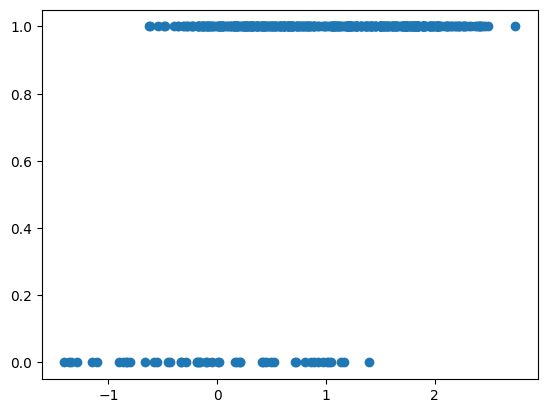

In [175]:
plt.scatter(X[:,0],Y)

## Training

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 30)

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

regression_model = LogisticRegression(random_state=30).fit(X_train, y_train)
svc_model = SVC(kernel="rbf").fit(X_train, y_train)
randomforest_model = RandomForestClassifier(random_state=30).fit(X_train,y_train)
gb_model = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.05).fit(X_train,y_train)

## Testing / Optimization

In [178]:
regression_model.score(X_test, y_test)

0.9133333333333333

In [179]:
svc_model.score(X_test, y_test)

0.9466666666666667

In [180]:
randomforest_model.score(X_test,y_test)

0.9666666666666667

In [181]:
gb_model.score(X_test, y_test)

0.9733333333333334

## Performance Analysis

In [182]:
def calc_rmse(model):
    return np.mean((model.predict(X_test)-y_test)**2)**0.5

In [183]:
print("Logistic Regression RMSE: ", calc_rmse(regression_model))
print("Support Vector Classifier RMSE: ", calc_rmse(svc_model))
print("RandomForestClassifier RMSE: ", calc_rmse(randomforest_model))
print("GradientBoostingClassifier RMSE: ", calc_rmse(gb_model))

Logistic Regression RMSE:  0.2943920288775949
Support Vector Classifier RMSE:  0.23094010767585033
RandomForestClassifier RMSE:  0.18257418583505536
GradientBoostingClassifier RMSE:  0.16329931618554522


In [184]:
# I'll be sticking to the Gradient Boosting Classifier for analyzing performance
from sklearn.metrics import classification_report
y_pred = gb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       0.98      0.99      0.98       131

    accuracy                           0.97       150
   macro avg       0.96      0.92      0.94       150
weighted avg       0.97      0.97      0.97       150



**I tried four different classifiers on the moons_dataset, and after optimization, recieved the highest accuracy of 97% with the GradientBoostingClassifier. Above are the classification reports when training the data with the GradientBoostingClassifier. We can see that the f1-score for negatives is 0.89 and positives is 0.98.** 